In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
df.dropna(inplace = True)

In [8]:
def TrueFalse(data):
    if data == False:
        return 0
    elif data == True:
        return 1

In [9]:
df['Transported'] = df['Transported'].apply(TrueFalse)
df['CryoSleep'] = df['CryoSleep'].apply(TrueFalse)
df['VIP'] = df['VIP'].apply(TrueFalse)

In [10]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [11]:
df.drop(['Cabin', 'Name'], axis = 1, inplace = True)

In [12]:
HPdummies = pd.get_dummies(df['HomePlanet'], drop_first=True)

In [13]:
HPdummies.head(10)

,Europa,Mars
0,1,0
1,0,0
2,1,0
3,1,0
4,0,0
5,0,0
6,0,0
8,0,0
9,1,0
11,1,0


In [14]:
df['Europa'] = HPdummies['Europa']
df['Mars'] = HPdummies['Mars']
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Europa,Mars
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0


In [15]:
df.drop(['RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck', 'Age','CryoSleep',
             'Mars','HomePlanet', 'Destination', 'PassengerId'], axis = 1, inplace = True)

In [16]:
df.head()

,VIP,Transported,Europa
0,0,0,1
1,0,1,0
2,1,0,1
3,0,0,1
4,0,1,0


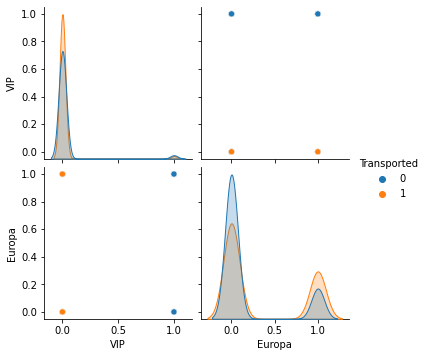

In [17]:
sns.pairplot(df, hue='Transported')

In [18]:
X_train = df.drop('Transported', axis = 1)
y_train = df['Transported']

In [19]:
X_train

,VIP,Europa
0,0,1
1,0,0
2,1,1
3,0,1
4,0,0
...,...,...
8688,1,1
8689,0,0
8690,0,0
8691,0,1


In [20]:
y_train

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 6606, dtype: int64

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(X_train,y_train)

LogisticRegression()

In [24]:
answer = pd.read_csv("sample_submission.csv")
testdf = pd.read_csv('test.csv')

In [25]:
answer.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [26]:
testdf.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [27]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [28]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [29]:
final_df = pd.merge(testdf, answer)

In [30]:
final_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,False
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,False
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,False


In [31]:
final_df.dropna(inplace = True)

In [32]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   3281 non-null   object 
 1   HomePlanet    3281 non-null   object 
 2   CryoSleep     3281 non-null   object 
 3   Cabin         3281 non-null   object 
 4   Destination   3281 non-null   object 
 5   Age           3281 non-null   float64
 6   VIP           3281 non-null   object 
 7   RoomService   3281 non-null   float64
 8   FoodCourt     3281 non-null   float64
 9   ShoppingMall  3281 non-null   float64
 10  Spa           3281 non-null   float64
 11  VRDeck        3281 non-null   float64
 12  Name          3281 non-null   object 
 13  Transported   3281 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 362.1+ KB


In [33]:
final_df['VIP'] = final_df['VIP'].apply(TrueFalse)
final_df['Transported'] = final_df['Transported'].apply(TrueFalse)

In [34]:
homedummies = pd.get_dummies(final_df['HomePlanet'], drop_first=True)

In [35]:
homedummies.head(1)

,Europa,Mars
0,0,0


In [36]:
final_df['Europa'] = homedummies['Europa']

In [37]:
final_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Europa
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0,0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0,0


In [38]:
final_df.drop(['HomePlanet', 'Destination', 'RoomService', 'FoodCourt', 'ShoppingMall',
               'Spa', 'VRDeck', 'Age','CryoSleep', 'PassengerId', 'Cabin', 'Name'], axis=1, inplace=True)

In [39]:
final_df.head()

,VIP,Transported,Europa
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,0


In [40]:
df.head()

,VIP,Transported,Europa
0,0,0,1
1,0,1,0
2,1,0,1
3,0,0,1
4,0,1,0


In [41]:
y_test = final_df['Transported']
X_test = final_df.drop('Transported', axis=1)

In [42]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
4269    0
4270    0
4271    0
4272    0
4276    0
Name: Transported, Length: 3281, dtype: int64

In [43]:
X_test

,VIP,Europa
0,0,0
1,0,0
2,0,1
3,0,1
4,0,0
...,...,...
4269,0,0
4270,0,0
4271,0,0
4272,0,0


In [49]:
prediction = lr.predict(X_test)